# Generate a CNN Model

In [42]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from keras.layers import Conv2D, Input, Dense, Activation, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from keras.utils import to_categorical
from tensorflow.keras.datasets.mnist import load_data

In [43]:
inputs = Input((28, 28, 1))
x = Conv2D(filters = 32, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(inputs)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides=(1,1), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D()(x)

In [44]:
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
without_augmented_model = Model(inputs, outputs, name = 'CNN_Not_Augmented')
with_augmented_model = Model(inputs, outputs, name = 'CNN_Augmented')


# Display the Generated Model trained with non augmented Data with the required number of Parameters

In [45]:
without_augmented_model.summary()

Model: "CNN_Not_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,346 (3.14 MB)

 Trainable params: 822,346 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# plot_model(without_augmented_model, to_file='model_plot_non_augmented.png', show_shapes=True, show_layer_names=True)

# Display the Generated Model trained with Augmented Data with the required number of Parameters

In [47]:
with_augmented_model.summary()

Model: "CNN_Augmented"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,346 (3.14 MB)

 Trainable params: 822,346 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# plot_model(with_augmented_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load The MNIST Data

In [49]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))


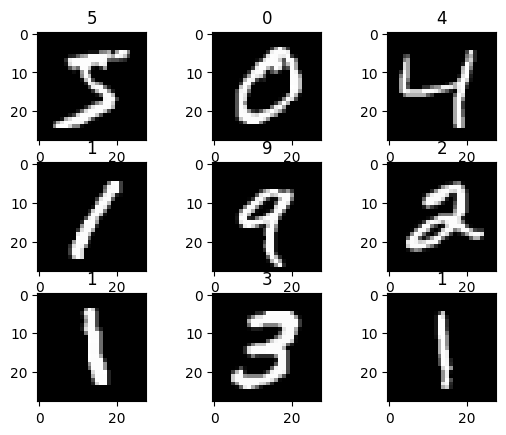

In [50]:
# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))

# Dispaly some loaded image data
display_img(trainX[:9], trainY[:9])

In [51]:
# Turn 2D images into 3D.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))

# Turn y into one-hot-encoding
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)


# print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print(f'trainy.shpae{trainY.shape} testy.shape{testY.shape}')
print(trainY[:5])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainy.shpae(60000, 10) testy.shape(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Apply Augmentation on Trainx and TestX

In [52]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range= 5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

# Generate augmented data
augmented_data = []
augmented_labels = []
for x_batch, y_batch in datagen.flow(trainX, trainY, batch_size=32, shuffle=False):
    augmented_data.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_data) * 32 >= len(trainX):  # Generate at least one full dataset of augmented data
        break

augmented_data = np.concatenate(augmented_data)
augmented_labels = np.concatenate(augmented_labels)

# Combine the original data with the augmented data
trainX_augmented = np.concatenate((trainX, augmented_data), axis=0)
trainY_augmented = np.concatenate((trainY, augmented_labels), axis=0)

print(f'Augmented trainX shape: {trainX_augmented.shape}, Augmented trainY shape: {trainY_augmented.shape}')

#augment the test data
augmented_test_data = []
augmented_test_labels = []
for x_batch, y_batch in datagen.flow(testX, testY, batch_size=32, shuffle=False):
    augmented_test_data.append(x_batch)
    augmented_test_labels.append(y_batch)
    if len(augmented_test_data) * 32 >= len(testX):  # Generate at least one full dataset of augmented data
        break

augmented_test_data = np.concatenate(augmented_test_data)
augmented_test_labels = np.concatenate(augmented_test_labels)

# Combine the original test data with the augmented test data
testX_augmented = np.concatenate((testX, augmented_test_data), axis=0)
testY_augmented = np.concatenate((testY, augmented_test_labels), axis=0)

print(f'Augmented testX shape: {testX_augmented.shape}, Augmented testY shape: {testY_augmented.shape}')


Augmented trainX shape: (120000, 28, 28, 1), Augmented trainY shape: (120000, 10)
Augmented testX shape: (20000, 28, 28, 1), Augmented testY shape: (20000, 10)


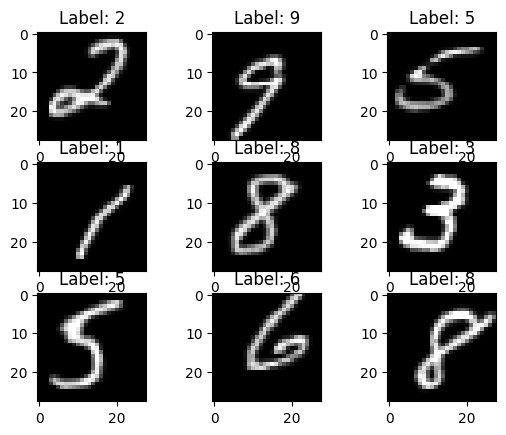

In [81]:
# Convert one-hot encoded labels to class indices
titles = [f'Label: {np.argmax(label)}' for label in trainY_augmented[-9:]]

# Display the images with the corresponding titles
display_img(trainX_augmented[-9:], titles)


# Train The Model Without Augmented Data

In [63]:
without_augmented_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
without_augmented_history = without_augmented_model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9980 - loss: 0.0326 - val_accuracy: 0.9968 - val_loss: 0.0459
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0362 - val_accuracy: 0.9977 - val_loss: 0.0666
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9978 - loss: 0.0324 - val_accuracy: 0.9967 - val_loss: 0.0556
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0317 - val_accuracy: 0.9970 - val_loss: 0.0898
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9985 - loss: 0.0179 - val_accuracy: 0.9977 - val_loss: 0.0605
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9990 - loss: 0.0141 - val_accuracy: 0.9972 - val_loss: 0.0856
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9986 - loss: 0.0233 - val_accuracy: 0.9977 - val_loss: 0.0543
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9992 - loss: 0.0145

In [64]:
# # Loss curve
# plt.plot(without_augmented_history.history['loss'],linewidth=2, label='Training Loss')
# plt.plot(without_augmented_history.history['val_loss'],linewidth=2, label='Validation Loss')
# plt.title('Loss Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [65]:
# # Accuracy curve
# plt.plot(without_augmented_history.history['accuracy'], linewidth=2, label='Training Accuracy')
# plt.plot(without_augmented_history.history['val_accuracy'], linewidth=2, label='Validation Accuracy')
# plt.title('Accuracy Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Adjust layout and display the plot
# plt.show()

In [66]:
# Non-augmented model on non-augmented data
score_of_non_augmented_model_with_non_augmented_data = without_augmented_model.evaluate(testX, testY, verbose=0)


# Non-augmented model on augmented data
score_of_non_augmented_model_with_augmented_data = without_augmented_model.evaluate(testX_augmented, testY_augmented, verbose=0)


Accuracy of on non-augmented model on non-augmented data: 98.94%
Accuracy of non-augmented model on augmented data: 97.65%


# Train The Model With Augmented Data

In [67]:
with_augmented_model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
with_augmented_history = with_augmented_model.fit(trainX_augmented, trainY_augmented, batch_size = 32, validation_split = 0.1, epochs = 15)

Epoch 1/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9949 - loss: 0.0674 - val_accuracy: 0.9688 - val_loss: 0.6395
Epoch 2/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9961 - loss: 0.0585 - val_accuracy: 0.9734 - val_loss: 0.9050
Epoch 3/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9971 - loss: 0.0415 - val_accuracy: 0.9715 - val_loss: 0.7797
Epoch 4/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9970 - loss: 0.0442 - val_accuracy: 0.9739 - val_loss: 0.7813
Epoch 5/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9975 - loss: 0.0369 - val_accuracy: 0.9787 - val_loss: 0.8961
Epoch 6/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9970 - loss: 0.0396 - val_accuracy: 0.9720 - val_loss: 0.8981
Epoch 7/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9980 - loss: 0.0294 - val_accuracy: 0.9755 - val_loss: 1.0145
Epoch 8/15
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9980 - loss: 0

In [68]:
# # Loss curve
# plt.plot(with_augmented_history.history['loss'],linewidth=2, label='Training Loss')
# plt.plot(with_augmented_history.history['val_loss'],linewidth=2, label='Validation Loss')
# plt.title('Loss Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [69]:
# # Accuracy curve
# plt.plot(with_augmented_history.history['accuracy'], linewidth=2, label='Training Accuracy')
# plt.plot(with_augmented_history.history['val_accuracy'], linewidth=2, label='Validation Accuracy')
# plt.title('Accuracy Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Adjust layout and display the plot
# plt.show()

In [70]:
# # Loss curve
# plt.plot(without_augmented_history.history['loss'], marker='.', linewidth=2, label='Without Augmented Training Loss')
# plt.plot(without_augmented_history.history['val_loss'], marker='.', linewidth=2, label='Without Augmented Validation Loss')
# plt.plot(with_augmented_history.history['loss'], marker='x', linewidth=2, linestyle='--', label='Augmented Training Loss')
# plt.plot(with_augmented_history.history['val_loss'], marker='x', linewidth=2, linestyle='--', label='Augmented Validation Loss')
# plt.title('Loss Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

In [71]:
# # Accuracy curve
# plt.plot(without_augmented_history.history['accuracy'], marker='.', linewidth=2, label='Without Augmented Training Accuracy')
# plt.plot(without_augmented_history.history['val_accuracy'], marker='.', linewidth=2, label='Without Augmented Validation Accuracy')
# plt.plot(with_augmented_history.history['accuracy'], marker='+', linewidth=2, linestyle='--', label='Augmented Training Accuracy')
# plt.plot(with_augmented_history.history['val_accuracy'], marker='+', linewidth=2, linestyle='--', label='Augmented Validation Accuracy')
# plt.title('Accuracy Curve')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# Evaluate The Models

In [ ]:
# Augmented model on non-augmented data
score_of_augmented_model_with_non_augmented_data = with_augmented_model.evaluate(testX, testY, verbose=0)

# Augmented model on augmented data
score_of_augmented_model_with_augmented_data = with_augmented_model.evaluate(testX_augmented, testY_augmented, verbose=0)

In [74]:
#Non augmented Model
print(f'Accuracy of on non-augmented model on non-augmented data: {score_of_non_augmented_model_with_non_augmented_data[1] * 100:.2f}%')
print(f'Accuracy of non-augmented model on augmented data: {score_of_non_augmented_model_with_augmented_data[1] * 100:.2f}%')

#Augmented Model
print(f'Accuracy of augmented model on non augmented data {score_of_augmented_model_with_non_augmented_data[1]*100:.2f}%')
print(f'Accuracy of augmented Model data on augmented data {score_of_augmented_model_with_augmented_data[1]*100:.2f}%')

Accuracy of on non-augmented model on non-augmented data: 98.94%
Accuracy of non-augmented model on augmented data: 97.65%
Accuracy of augmented model on non augmented data 98.86%
Accuracy of augmented Model data on augmented data 98.29%


In [78]:
import pandas as pd
from tabulate import tabulate

# Creating a dictionary to store the values
data = {
    'Non-Augmented Data': [
        f"{score_of_non_augmented_model_with_non_augmented_data[1] * 100:.2f}%",
        f"{score_of_augmented_model_with_non_augmented_data[1] * 100:.2f}%"
    ],
    'Augmented Data': [
        f"{score_of_non_augmented_model_with_augmented_data[1] * 100:.2f}%",
        f"{score_of_augmented_model_with_augmented_data[1] * 100:.2f}%"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data, index=['Non-Augmented Model', 'Augmented Model'])

# Displaying the DataFrame as a table with spacing
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒═════════════════════╤══════════════════════╤══════════════════╕
│                     │ Non-Augmented Data   │ Augmented Data   │
╞═════════════════════╪══════════════════════╪══════════════════╡
│ Non-Augmented Model │ 98.94%               │ 97.65%           │
├─────────────────────┼──────────────────────┼──────────────────┤
│ Augmented Model     │ 98.86%               │ 98.29%           │
╘═════════════════════╧══════════════════════╧══════════════════╛
